### 공공데이터 다루기

#### import

In [1]:
import pandas as pd
import numpy as np
import os
import openpyxl # xlsx 파일이 안읽혀졌음.

#### 경로 설정 및 데이터 불러오기

In [2]:
# 현재 경로 설정
os.getcwd()

# 데이터 불러오기
data = pd.read_excel('data/danawa.xlsx')
data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0


#### 데이터 탐색

In [3]:
# columns 확인 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    241 non-null    object 
 1   회사명     241 non-null    object 
 2   제품      241 non-null    object 
 3   가격      241 non-null    int64  
 4   사용시간    218 non-null    float64
 5   흡입력     129 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.4+ KB


In [6]:
# 흡입력 기준 정렬 -> 흡입력이 가장 높은 제품이 뭔지 확인
top_list = data.sort_values(["흡입력"],ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0
165,핸디/스틱청소기,DIBEA,TSX-25000A,244470,45.0,250.0
143,핸디/스틱청소기,DIBEA,F20 울트라 맥스,236550,60.0,250.0
152,핸디/스틱청소기,아이룸,RS1,178000,40.0,250.0


In [7]:
# 사용시간 기준 정렬 
top_list = data.sort_values(["사용시간"],ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
111,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,845990,120.0,200.0
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
153,핸디/스틱청소기,샤오미,이지에 YE-01,24740,120.0,NaN
16,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,918120,120.0,200.0
76,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,870910,120.0,200.0


In [8]:
# 가격 기준 정렬
top_list_price = data.sort_values(['가격'], ascending= False)
top_list_price.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
74,핸디/스틱청소기,LG전자,코드제로 A9 A960,1510190,80.0,140.0
81,핸디/스틱청소기,다이슨,V8 플러피 헤파,1097990,40.0,115.0
89,핸디/스틱청소기,다이슨,V8 모터헤드 헤파,1045700,40.0,115.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
85,핸디/스틱청소기,LG전자,코드제로 A9 A940,999990,80.0,140.0


In [9]:
# 흡입력, 사용시간을 기준으로 정렬
top_list = data.sort_values(["사용시간","흡입력"], ascending = False) #칼럼 순서대로 우선 순위
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
16,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,918120,120.0,200.0
76,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,870910,120.0,200.0
109,핸디/스틱청소기,삼성전자,제트 VS20R9077Q3,931100,120.0,200.0
111,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,845990,120.0,200.0


In [10]:
# 평균값 정리
price_mean = round(data['가격'].mean(),2)
suction_mean = round(data['흡입력'].mean(),2)
use_time_mean = round(data['사용시간'].mean(),2)
print("가격 평균값 : ", price_mean)
print("흡입력 평균값 : ", suction_mean)
print("사용시간 평균값 : ", use_time_mean)

가격 평균값 :  296844.79
흡입력 평균값 :  151.83
사용시간 평균값 :  43.39


In [11]:
# 가성비 좋은 제품 탐색

# 조건문 : (data['가격'] <= price_mean) & (data['흡입력'] >= suction_mean) & (data['사용시간'] >= use_time_mean) 각 시리즈가 곱해져서 series가 출력됨
condition_data = data [(data['가격'] <= price_mean) & 
                       (data['흡입력'] >= suction_mean) & 
                       (data['사용시간'] >= use_time_mean)]
condition_data.sort_values(['가격']) # 가성비에 맞는 것 중 가격이 제일 싼 제품

,카테고리,회사명,제품,가격,사용시간,흡입력
73,핸디/스틱청소기,JDL,tech 타이푼 DV-889DC-X,137160,50.0,200.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
134,핸디/스틱청소기,샤오미,미지아 1C SCWXCQ02ZHM,148990,60.0,200.0
205,핸디/스틱청소기,원더스리빙,다이나킹 Z7,154230,45.0,200.0
42,핸디/스틱청소기,DIBEA,F20 프로,161970,50.0,220.0
169,핸디/스틱청소기,캐치웰,CX11,168990,60.0,200.0
156,핸디/스틱청소기,DIBEA,F20,173220,50.0,220.0
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
140,핸디/스틱청소기,아낙,ANA-1930,179000,60.0,210.0


### 청소기 데이터 시각화 

In [16]:
# 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import platform 

font_path = '' 

if platform.system() == 'Windows':
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    %matplotlib inline

In [17]:
# 시각화를 위해 null data 정리 하기위해 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    241 non-null    object 
 1   회사명     241 non-null    object 
 2   제품      241 non-null    object 
 3   가격      241 non-null    int64  
 4   사용시간    218 non-null    float64
 5   흡입력     129 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.4+ KB


In [18]:
# null data 확인
data.isnull().sum()

카테고리      0
회사명       0
제품        0
가격        0
사용시간     23
흡입력     112
dtype: int64

In [19]:
data['흡입력'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237     True
238     True
239    False
240    False
Name: 흡입력, Length: 241, dtype: bool

In [24]:
# 결측값 없애기
chart_data = data.dropna(axis = 0) # null 있는 행 삭제 (다만 모두 삭제 했어 ,, 아깝게)
chart_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0
...,...,...,...,...,...,...
231,핸디/스틱청소기,지웰,ST-007+8040MT,101980,45.0,70.0
235,핸디/스틱청소기,다이슨,V7 모터헤드,417540,30.0,100.0
236,핸디/스틱청소기,블랙앤데커,PD1810BEXT,108000,17.0,25.0
239,핸디/스틱청소기,보랄,BR-SV380RC,94050,40.0,80.0


In [26]:
# null data 확인
chart_data['흡입력'].isnull().sum()

0

In [27]:
chart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    123 non-null    object 
 1   회사명     123 non-null    object 
 2   제품      123 non-null    object 
 3   가격      123 non-null    int64  
 4   사용시간    123 non-null    float64
 5   흡입력     123 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.7+ KB


In [28]:
# 흡입력, 사용시간의 최댓값/최솟값 정리
suction_max = chart_data['흡입력'].max()
suction_mean = chart_data['흡입력'].mean()
use_time_max = chart_data['사용시간'].max()
use_time_mean = chart_data['사용시간'].mean()

In [29]:
#import
import matplotlib.pyplot as plt
import seaborn as sns

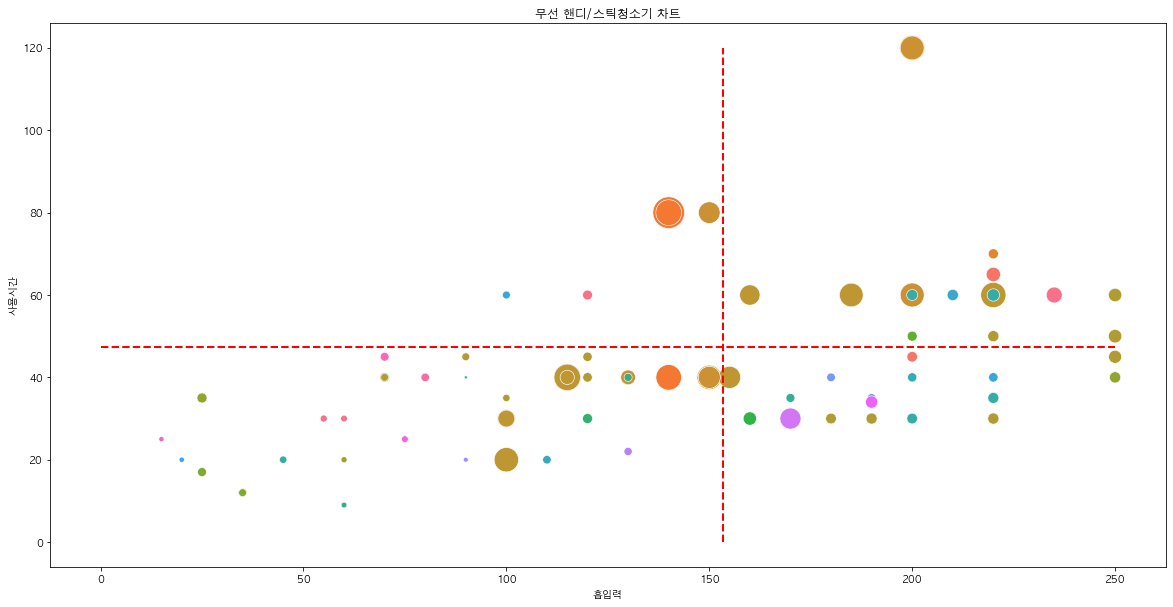

In [52]:
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = '회사명', 
                data = chart_data, sizes = (10, 1000), legend = False) # hue = 색상
plt.plot([0, suction_max], [use_time_mean, use_time_mean], 'r--', lw = 2)
plt.plot([suction_mean, suction_mean], [0, use_time_max], 'r--', lw = 2)
plt.show()

In [55]:
# 인기 제품 20개 선택
chart_data_selected = chart_data[:20] # 이건 그냥 1번부터 20번 선택한 것 (데이터가 원래 인기순이라면 말이됨) 
len(chart_data_selected) # 그게 아니라면 무엇인가 척도를 만들어서 새로운 변수(칼럼)을 만들어서 정렬해야함. 

20

In [78]:
# 흡입력, 사용시간의 최댓값, 최솟값 구하기
suction_max = chart_data_selected['흡입력'].max()
suction_mean = chart_data_selected['흡입력'].mean()
use_time_max = chart_data_selected['사용시간'].max()
use_time_mean = chart_data_selected['사용시간'].mean()

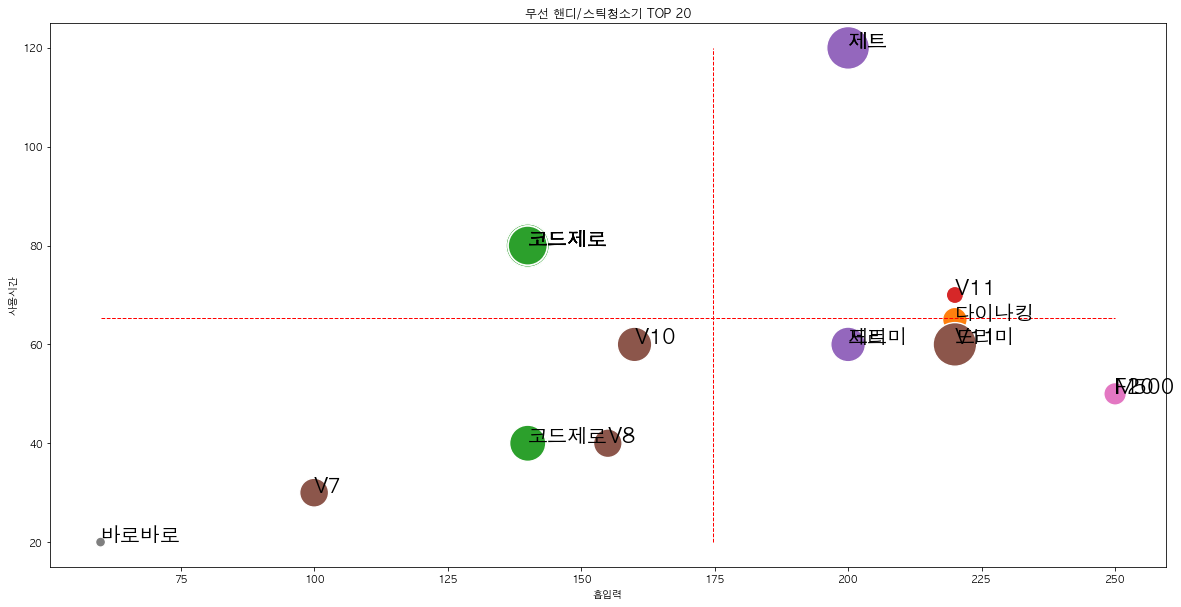

In [79]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', 
                hue = chart_data_selected['회사명'], 
                data = chart_data_selected, sizes = (100, 2000),
                legend = False)

plt.plot([60, suction_max], [use_time_mean, use_time_mean], 'r--', lw = 1 )
plt.plot([suction_mean, suction_mean], [20, use_time_max], 'r--', lw = 1 )

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20) # x,y = 좌표, s = 텍스트 
    
plt.show()